# Milestone 3 - Regression Simulation

## Author - Nourhan El Zarif

# Preparing the Data

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
# Location of dataset
file = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
kc_house= pd.read_csv(file)
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Cleaning
I will select some features for principal component analysis. These features are selected based on the data exploration from previous milestones.

In [3]:
#selecting a few features 
feature_labels = kc_house[['condition', 'waterfront', 'yr_built', 'sqft_living15', 'bedrooms']]
target_label = 'price'

In [4]:
#checking for NaNs
feature_labels.isnull().any()

condition        False
waterfront       False
yr_built         False
sqft_living15    False
bedrooms         False
dtype: bool

The columns we're interested in do not have null values.

In [5]:
y = kc_house[target_label]
X = feature_labels.as_matrix()

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
X

array([[   3,    0, 1955, 1340,    3],
       [   3,    0, 1951, 1690,    3],
       [   3,    0, 1933, 2720,    2],
       ...,
       [   3,    0, 2009, 1020,    2],
       [   3,    0, 2004, 1410,    3],
       [   3,    0, 2008, 1020,    2]], dtype=int64)

## Scaling
The features must be scaled first for PCA.

In [7]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [8]:
# Scale all columns first
# Create x-scaled .
x_scaled = np.apply_along_axis(scale, 0, X)
# Create a scaled y-target.
y_scaled = scale(y)

# Generate Working Model: PCR

## Principcal Component Analysis (PCA)

In [9]:
pca = PCA()
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

Text(0, 0.5, 'Explained Variance')

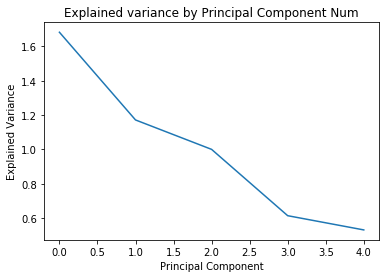

In [10]:
plt.plot(pca.explained_variance_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

The plot above shows the explained variance of the principcal components 0 to 4. For every additional component, it accounts for less explained variance. But, we can see that the line is not very steep.

The array below shows the exact explained variance for every component. The highest accounts for 1.6, and the lowest for 0.5. I will include all 5 compoents for PCR because the difference isn't very significant.

In [11]:
print(pca.explained_variance_)

[1.68270617 1.17182568 1.00039168 0.61407057 0.53123726]


## PCR

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     3105.
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:30:28   Log-Likelihood:                -24816.
No. Observations:               21613   AIC:                         4.964e+04
Df Residuals:                   21607   BIC:                         4.969e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.123e-17      0.005  -6.02e-15      1.0

Text(0.5, 1.0, 'Residual Histogram')

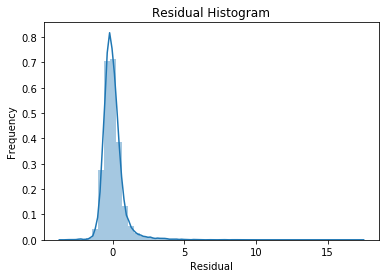

In [12]:
# Perform linear regression with the first N columns.
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

# Conclusion

The adjusted R-squared value is 0.418. This means that the model does not fit the data very well. The partial intercepts have low p-values and the confidence intervals do not straddle 0. A linear regression model is not very good for this data.